# Contents

[KNN on train 0](#train0) <br>
[KNN on train 1](#train1) <br>
[KNN on train 2](#train2) <br>
[KNN on train 3](#train3) <br>
[KNN on train 4](#train4) <br>
[Results analysis](#results)

### Import

In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import researchpy as rp
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from scipy.stats import skew 
from sklearn.model_selection import train_test_split
# # machine learning library
# from sklearn.linear_model import LinearRegression
# from sklearn import svm
# # data normalization from sklearn
# from sklearn.preprocessing import MinMaxScaler
# # data standardization from sklearn
# from sklearn.preprocessing import StandardScaler
# KNN regressor
from sklearn import neighbors
# calculate error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# computational time
import time

from math import sqrt

FROM EDA:

LotFrontage /number of null data: 259

MasVnrArea /number of null data: 8

Electrical /number of null data: 1

GarageYrBlt /number of null data: 81

For feature with too many missing values, remove this feature entirely. 
- Set treshold to be 10% of all data points

For feature with only a few missing values, remove that data point.

In [2]:
train0 = pd.read_csv('train.csv')

# Remove null
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train0)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train0.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train0.dropna(subset=drop, inplace=True)

# OHE
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
train0 = pd.get_dummies(train0, columns= categorical, prefix= categorical)

train0.head()

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [3]:
#importing the csv datasets
print('train0 shape:', train0.shape)

train1 = pd.read_csv('train_ONE.csv')
print('train1 shape:', train1.shape)

train2 = pd.read_csv('train_TWO.csv')
print('train2 shape:', train2.shape)

train3 = pd.read_csv('train_THREE.csv')
print('train3 shape:', train3.shape)

train4 = pd.read_csv('train_FOUR.csv')
print('train4 shape:', train4.shape)

train0 shape: (1370, 316)
train1 shape: (1370, 70)
train2 shape: (688, 75)
train3 shape: (688, 75)
train4 shape: (688, 75)


### Train 0 (no optimizations) <a class="anchor" id="train0"></a>

In [4]:
print('KNN for optimization set 0:')

X0 = train0.copy()
X0.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y0 = train0['SalePrice'][:,None]

train_X0, test_X0, train_y0, test_y0 = train_test_split(X0,y0,test_size=0.2, shuffle=False)

R2_0 = []
mse_0 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X0, train_y0)  #fit the model
    pred = knn.predict(test_X0) #make prediction on test set
    
    R2 = r2_score(test_y0, pred)
    R2_0.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)
    
    mse = mean_squared_error(test_y0, pred)
    mse_0.append(mse)
    print('MSE for k = ' , K , 'is:', mse)


KNN for optimization set 0:
R2 score for k =  1 is: 0.42585399685555725
MSE for k =  1 is: 3669934055.8868613
R2 score for k =  2 is: 0.4540387059646859
MSE for k =  2 is: 3489777748.521898
R2 score for k =  3 is: 0.4995254532564951
MSE for k =  3 is: 3199027029.95296
R2 score for k =  4 is: 0.5157478471035619
MSE for k =  4 is: 3095333691.810219
R2 score for k =  5 is: 0.5343182558438143
MSE for k =  5 is: 2976631871.8997083
R2 score for k =  6 is: 0.5296867739288087
MSE for k =  6 is: 3006236246.250507
R2 score for k =  7 is: 0.5478720018956165
MSE for k =  7 is: 2889996497.0160885
R2 score for k =  8 is: 0.5770793199677777
MSE for k =  8 is: 2703303685.9765625
R2 score for k =  9 is: 0.5687173114047754
MSE for k =  9 is: 2756753539.903803
R2 score for k =  10 is: 0.5721980208957658
MSE for k =  10 is: 2734504888.463796
R2 score for k =  11 is: 0.5804159984880813
MSE for k =  11 is: 2681975678.695934
R2 score for k =  12 is: 0.572541588341702
MSE for k =  12 is: 2732308809.6555657
R2

Text(0.5, 1.0, 'R2 test score:')

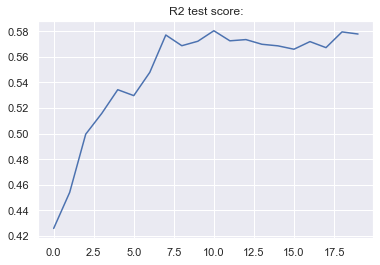

In [5]:
plt.plot(R2_0)
plt.title("R2 test score:")

Text(0.5, 1.0, 'MSE test score:')

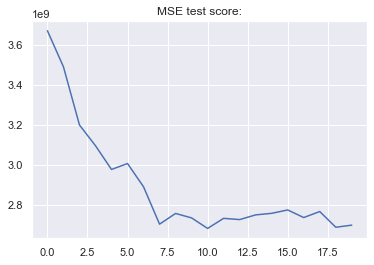

In [6]:
plt.plot(mse_0)
plt.title("MSE test score:")

In [7]:
print('Best R2 score is \t\t:', max(R2_0))
print('Most optimal value of K is \t:', R2_0.index(max(R2_0))+1)

print('Best MSE score is \t\t:', min(mse_0))
print('Most optimal value of K is \t:', mse_0.index(min(mse_0))+1)

Best R2 score is 		: 0.5804159984880813
Most optimal value of K is 	: 11
Best MSE score is 		: 2681975678.695934
Most optimal value of K is 	: 11


### Train 1 <a class="anchor" id="train1"></a>

In [8]:
print('KNN for optimization set 1:')

X1 = train1.copy()
X1.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y1 = train1['SalePrice'][:,None]

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1,y1,test_size=0.2, shuffle=False)

R2_1 = []
mse_1 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X1, train_y1)  #fit the model
    pred = knn.predict(test_X1) #make prediction on test set
    
    R2 = r2_score(test_y1, pred)
    R2_1.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)
    
    mse = mean_squared_error(test_y1, pred)
    mse_1.append(mse)
    print('MSE for k = ' , K , 'is:', mse)


KNN for optimization set 1:
R2 score for k =  1 is: 0.43936494459646214
MSE for k =  1 is: 3583572247.270073
R2 score for k =  2 is: 0.4823332215364451
MSE for k =  2 is: 3308919559.624088
R2 score for k =  3 is: 0.5059385152878977
MSE for k =  3 is: 3158034817.8280616
R2 score for k =  4 is: 0.514397377929916
MSE for k =  4 is: 3103965873.841697
R2 score for k =  5 is: 0.531723522520586
MSE for k =  5 is: 2993217374.7799997
R2 score for k =  6 is: 0.5279203769320449
MSE for k =  6 is: 3017527033.714213
R2 score for k =  7 is: 0.5543819663197982
MSE for k =  7 is: 2848384886.011098
R2 score for k =  8 is: 0.5768921593784349
MSE for k =  8 is: 2704500014.117815
R2 score for k =  9 is: 0.5661740272077418
MSE for k =  9 is: 2773010180.6143103
R2 score for k =  10 is: 0.5656403891592079
MSE for k =  10 is: 2776421188.3320436
R2 score for k =  11 is: 0.5753033024034754
MSE for k =  11 is: 2714655967.987392
R2 score for k =  12 is: 0.573306046234319
MSE for k =  12 is: 2727422404.387495
R2 s

Text(0.5, 1.0, 'R2 test score:')

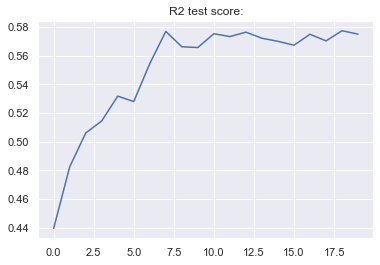

In [9]:
plt.plot(R2_1)
plt.title("R2 test score:")

Text(0.5, 1.0, 'MSE test score:')

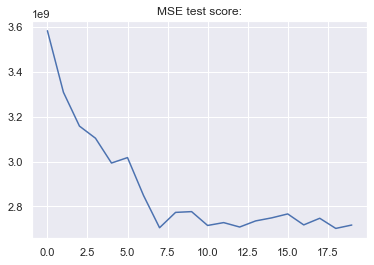

In [10]:
plt.plot(mse_1)
plt.title("MSE test score:")

In [11]:
print('Best R2 score is \t\t:', max(R2_1))
print('Most optimal value of K is \t:', R2_1.index(max(R2_1))+1)

print('Best MSE score is \t\t:', min(mse_1))
print('Most optimal value of K is \t:', mse_1.index(min(mse_1))+1)

Best R2 score is 		: 0.5773640620617113
Most optimal value of K is 	: 19
Best MSE score is 		: 2701483618.08103
Most optimal value of K is 	: 19


### Train 2 <a class="anchor" id="train2"></a>

In [12]:
print('KNN for optimization set 2:')

X2 = train2.copy()
X2.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y2 = train2['SalePrice'][:,None]

train_X2, test_X2, train_y2, test_y2 = train_test_split(X2,y2,test_size=0.2, shuffle=False)

R2_2 = []
mse_2 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X2, train_y2)  #fit the model
    pred = knn.predict(test_X2) #make prediction on test set
    
    R2 = r2_score(test_y2, pred)
    R2_2.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)
    
    mse = mean_squared_error(test_y2, pred)
    mse_2.append(mse)
    print('MSE for k = ' , K , 'is:', mse)


KNN for optimization set 2:
R2 score for k =  1 is: 0.5433130841411632
MSE for k =  1 is: 1699197392.8115942
R2 score for k =  2 is: 0.5625141466158005
MSE for k =  2 is: 1627755899.3876812
R2 score for k =  3 is: 0.6316408514932789
MSE for k =  3 is: 1370555807.5466988
R2 score for k =  4 is: 0.6215483917202167
MSE for k =  4 is: 1408106875.330616
R2 score for k =  5 is: 0.656547177926459
MSE for k =  5 is: 1277886708.7173913
R2 score for k =  6 is: 0.6634746460112125
MSE for k =  6 is: 1252111642.036836
R2 score for k =  7 is: 0.621123454663105
MSE for k =  7 is: 1409687940.858178
R2 score for k =  8 is: 0.6345345899072043
MSE for k =  8 is: 1359789059.9179122
R2 score for k =  9 is: 0.6371954854266926
MSE for k =  9 is: 1349888652.062444
R2 score for k =  10 is: 0.6589571407023588
MSE for k =  10 is: 1268919947.6314495
R2 score for k =  11 is: 0.6628067445789787
MSE for k =  11 is: 1254596706.3837585
R2 score for k =  12 is: 0.6614902045647651
MSE for k =  12 is: 1259495163.690066
R

Text(0.5, 1.0, 'R2 test score:')

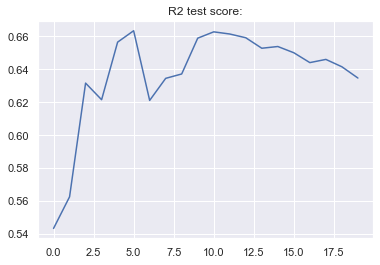

In [13]:
plt.plot(R2_2)
plt.title("R2 test score:")

Text(0.5, 1.0, 'MSE test score:')

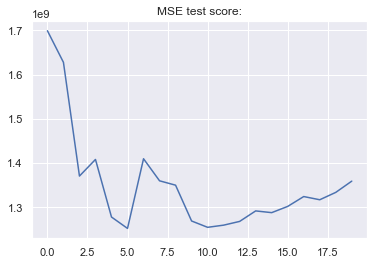

In [14]:
plt.plot(mse_2)
plt.title("MSE test score:")

In [15]:
print('Best R2 score is \t\t:', max(R2_2))
print('Most optimal value of K is \t:', R2_2.index(max(R2_2))+1)

print('Best MSE score is \t\t:', min(mse_2))
print('Most optimal value of K is \t:', mse_2.index(min(mse_2))+1)

Best R2 score is 		: 0.6634746460112125
Most optimal value of K is 	: 6
Best MSE score is 		: 1252111642.036836
Most optimal value of K is 	: 6


### Train 3 <a class="anchor" id="train3"></a>

In [16]:
print('KNN for optimization set 3:')

X3 = train3.copy()
X3.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y3 = train3['SalePrice'][:,None]

train_X3, test_X3, train_y3, test_y3 = train_test_split(X3,y3,test_size=0.2, shuffle=False)

R2_3 = []
mse_3 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X3, train_y3)  #fit the model
    pred = knn.predict(test_X3) #make prediction on test set
    
    R2 = r2_score(test_y3, pred)
    R2_3.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)
    
    mse = mean_squared_error(test_y3, pred)
    mse_3.append(mse)
    print('MSE for k = ' , K , 'is:', mse)


KNN for optimization set 3:
R2 score for k =  1 is: 0.6325764997391838
MSE for k =  1 is: 1367074536.231884
R2 score for k =  2 is: 0.7002848985380064
MSE for k =  2 is: 1115151543.2246377
R2 score for k =  3 is: 0.7316698016796239
MSE for k =  3 is: 998377570.2028985
R2 score for k =  4 is: 0.7468382612147764
MSE for k =  4 is: 941940203.5955616
R2 score for k =  5 is: 0.7658553617278103
MSE for k =  5 is: 871183178.4028986
R2 score for k =  6 is: 0.7679081891323517
MSE for k =  6 is: 863545212.7582527
R2 score for k =  7 is: 0.7676984498459565
MSE for k =  7 is: 864325590.8164743
R2 score for k =  8 is: 0.7661629567974315
MSE for k =  8 is: 870038707.8209919
R2 score for k =  9 is: 0.7790463937495562
MSE for k =  9 is: 822103236.6714975
R2 score for k =  10 is: 0.790495080122425
MSE for k =  10 is: 779506049.495
R2 score for k =  11 is: 0.7834047772974861
MSE for k =  11 is: 805886976.2437416
R2 score for k =  12 is: 0.7730626525403709
MSE for k =  12 is: 844366973.837661
R2 score fo

Text(0.5, 1.0, 'R2 test score:')

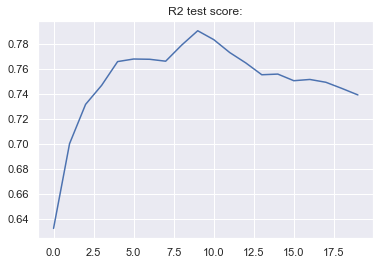

In [17]:
plt.plot(R2_3)
plt.title("R2 test score:")

Text(0.5, 1.0, 'MSE test score:')

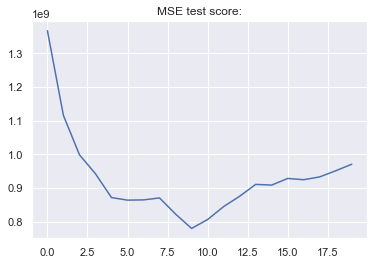

In [18]:
plt.plot(mse_3)
plt.title("MSE test score:")

In [19]:
print('Best R2 score is \t\t:', max(R2_3))
print('Most optimal value of K is \t:', R2_3.index(max(R2_3))+1)

print('Best MSE score is \t\t:', min(mse_3))
print('Most optimal value of K is \t:', mse_3.index(min(mse_3))+1)

Best R2 score is 		: 0.790495080122425
Most optimal value of K is 	: 10
Best MSE score is 		: 779506049.495
Most optimal value of K is 	: 10


### Train 4 <a class="anchor" id="train4"></a>

In [20]:
print('KNN for optimization set 4:')

X4 = train4.copy()
X4.drop(['Id', 'SalePrice'], axis=1, inplace=True)
y4 = train4['SalePrice'][:,None]

train_X4, test_X4, train_y4, test_y4 = train_test_split(X4,y4,test_size=0.2, shuffle=False)

R2_4 = []
mse_4 = []

for K in range(20):
    K += 1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(train_X4, train_y4)  #fit the model
    pred = knn.predict(test_X4) #make prediction on test set
    
    R2 = r2_score(test_y4, pred)
    R2_4.append(R2)
    print('R2 score for k = ' , K , 'is:', R2)
    
    mse = mean_squared_error(test_y4, pred)
    mse_4.append(mse)
    print('MSE for k = ' , K , 'is:', mse)

KNN for optimization set 4:
R2 score for k =  1 is: 0.7215534760460007
MSE for k =  1 is: 1036017435.8188406
R2 score for k =  2 is: 0.7773631662216418
MSE for k =  2 is: 828366030.125
R2 score for k =  3 is: 0.8092622162807541
MSE for k =  3 is: 709679067.9822868
R2 score for k =  4 is: 0.8077778023639506
MSE for k =  4 is: 715202134.5946558
R2 score for k =  5 is: 0.8167625198805754
MSE for k =  5 is: 681772649.2092754
R2 score for k =  6 is: 0.8128610955395703
MSE for k =  6 is: 696288699.1294284
R2 score for k =  7 is: 0.8081416224961844
MSE for k =  7 is: 713848467.1286601
R2 score for k =  8 is: 0.8102429925986945
MSE for k =  8 is: 706029888.4141757
R2 score for k =  9 is: 0.8116469951274793
MSE for k =  9 is: 700806008.8731438
R2 score for k =  10 is: 0.8151941148129287
MSE for k =  10 is: 687608222.1352174
R2 score for k =  11 is: 0.8122094470954305
MSE for k =  11 is: 698713290.8986706
R2 score for k =  12 is: 0.8117059098472736
MSE for k =  12 is: 700586804.5675323
R2 score 

Text(0.5, 1.0, 'R2 test score:')

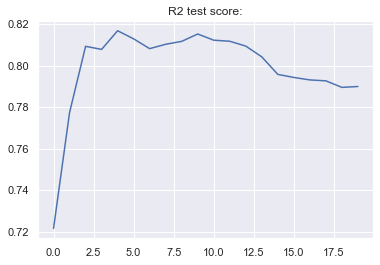

In [21]:
plt.plot(R2_4)
plt.title("R2 test score:")

Text(0.5, 1.0, 'MSE test score:')

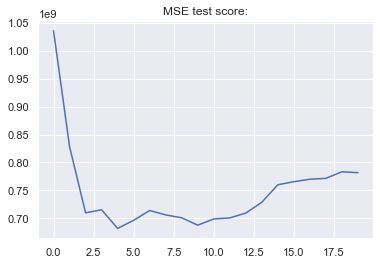

In [22]:
plt.plot(mse_4)
plt.title("MSE test score:")

In [23]:
print('Best R2 score is \t\t:', max(R2_4))
print('Most optimal value of K is \t:', R2_4.index(max(R2_4))+1)

print('Best MSE score is \t\t:', min(mse_4))
print('Most optimal value of K is \t:', mse_4.index(min(mse_4))+1)

Best R2 score is 		: 0.8167625198805754
Most optimal value of K is 	: 5
Best MSE score is 		: 681772649.2092754
Most optimal value of K is 	: 5


### Result analysis <a class="anchor" id="results"></a>

In [33]:
# R2

R2_all = []
maxR2_all= []

R2_all.append(R2_0)
R2_all.append(R2_1)
R2_all.append(R2_2)
R2_all.append(R2_3)
R2_all.append(R2_4)

for i in R2_all:
    maxR2_all.append(max(i))
    
best_R2_trainset = maxR2_all.index(max(maxR2_all))
best_R2_K = R2_all[best_R2_trainset].index(max(R2_all[best_R2_trainset])) + 1

print('According to R2:')
print('Best result is given by optimization set', best_R2_trainset, 'with K =', best_R2_K)
print('R2 score is', R2_all[best_R2_trainset][best_R2_K-1])

According to R2:
Best result is given by optimization set 4 with K = 5
R2 score is 0.8167625198805754


In [34]:
# MSE

mse_all = []
maxmse_all= []

mse_all.append(mse_0)
mse_all.append(mse_1)
mse_all.append(mse_2)
mse_all.append(mse_3)
mse_all.append(mse_4)

for i in mse_all:
    maxmse_all.append(min(i))
    
best_mse_trainset = maxmse_all.index(min(maxmse_all))
best_mse_K = mse_all[best_mse_trainset].index(min(mse_all[best_mse_trainset])) + 1

print('According to MSE:')
print('Best result is given by optimization set', best_mse_trainset, 'with K =', best_mse_K)
print('MSE score is', mse_all[best_mse_trainset][best_mse_K-1])

According to MSE:
Best result is given by optimization set 4 with K = 5
MSE score is 681772649.2092754


In [31]:
maxR2_all

[0.5804159984880813,
 0.5773640620617113,
 0.6634746460112125,
 0.790495080122425,
 0.8167625198805754]

In [32]:
maxmse_all

[2681975678.695934,
 2701483618.08103,
 1252111642.036836,
 779506049.495,
 681772649.2092754]